In [2]:
import pickle as pk
import matplotlib.pyplot as plt
import time

In [3]:
class GroupPlotter:
    def __init__(self, group_df):
        self.group_df = group_df

    def groupClusterInfo(self, group_df): # return dict {number_of_cluster: number_of_group}
        groupCluster = {}
        for idx in range(group_df.shape[0]):
            number_of_cluster = get_number_of_cluster(group_df, idx)
            if number_of_cluster not in groupCluster:
                groupCluster[number_of_cluster] = 1
            else:
                groupCluster[number_of_cluster] += 1
        return [(k,groupCluster[k]) for k in sorted(groupCluster.keys())] 
    
    def groupIpInfo(self, group_df): # return sorted dict {number_of_ip: number_of_group}
        ipCluster = {}
        for group_idx in range(group_df.shape[0]):
            number_of_ip = len(group_df.iloc[group_idx][1])
            if number_of_ip not in ipCluster:
                ipCluster[number_of_ip] = 1
            else:
                ipCluster[number_of_ip] += 1
        return [(k,ipCluster[k]) for k in sorted(ipCluster.keys())]
    
    def constructTimePair(self, start_date, end_date):
        time_pair = []
        candidate_date = [i for i in range(start_date, end_date + 1)]
        for date in candidate_date:
            if (date-1, 23) not in time_pair:
                time_pair.append((date-1, 23))
            for i in range(24):
                time_pair.append((date, i))
        return time_pair
    
    def plotLifeCycle(self, group_index):
        group_df = self.group_df
        plt.figure(figsize = (36,9))
        time_pair = self.constructTimePair(6, 12)
        for idx in range(group_df.shape[0]):
            idx = group_index
            session_time_dict = group_df.iloc[idx][1]
            cluster_id_dict = group_df.iloc[idx][2]
            x_tick = {}
            all_time = []
            counter = 0
            for ip in session_time_dict:
                x_axis = []
                y_axis = []
                x_axis.extend(session_time_dict[ip])
                y_axis.extend(cluster_id_dict[ip])
                all_time.extend(session_time_dict[ip])
        #         country_list = group_df.iloc[idx][3]
                plt.scatter(x_axis, y_axis, marker = "o", label = ip)
                counter +=1
                if counter == 10:
                    break    
            for item in time_pair:
                date = str(item[0])
                hour = str(item[1])
                date_time = "2020-01-" + date + " " + hour
                time_tuple = time.strptime(date_time, '%Y-%m-%d %H')
                time_epoch = time.mktime(time_tuple)
                x_tick[item] = time_epoch
            plt.xticks(list(x_tick.values()), list(x_tick.keys()), rotation=90)
            plt.legend()
            break
        plt.xlim(sorted(all_time)[0] - 3000, sorted(all_time)[-1] + 3000)
#         plt.savefig("./figure/group_" + str(group_index) + ".png")

## Plot

In [4]:
with open("/home/antslab/NAS1_RAID6/pcap_inter/2020_01_06/中華電信/case_pickles/CorrelateIP_DRAW_stat0.9.pkl", "rb")as file:
    group_df = pk.load(file)

In [5]:
group_df

,pattern_key,sessions_time_dict,cluster_id_dict,country_list,country_set,country_nums,country_portion,main_country,proto_set,cluster_set,cluster_nums,cluster_portion,ip_num,unique_country_num,unique_cluster_num,unique_protocols_num
0,185.100.87.191,"{'185.100.87.191': [1578827158.647363, 1578827...","{'185.100.87.191': ['20200106_213_http', '2020...","[Romania, United States, Romania, Romania, Rom...","[Romania, United States]","{'Romania': 6, 'United States': 2}","{'Romania': 0.75, 'United States': 0.25}",Romania,"[http, imap, pop, smb, smtp]","[20200106_103079219020_pop, 20200106_120259105...","{'20200106_252_http': 1462, '20200106_3_http':...","{'20200106_252_http': 0.26742271812694346, '20...",8,2,59,5
1,198.143.158.82,"{'198.143.158.82': [1578325916.274164, 1578333...","{'198.143.158.82': ['20200106_213_http', '2020...","[United States, Netherlands, United States, Ne...","[Netherlands, United States]","{'United States': 3, 'Netherlands': 3}","{'United States': 0.5, 'Netherlands': 0.5}",United States,"[ftp, http, imap, pop, smtp, ssh, telnet]","[20200106_111669172379_ftp, 20200106_14910_smt...","{'20200106_14910_smtp': 366, '20200106_252_htt...","{'20200106_14910_smtp': 0.10964649490713002, '...",6,2,44,7
2,61.178.160.156,"{'61.178.160.156': [1578381678.520108, 1578381...","{'61.178.160.156': ['20200106_1893_ftp', '2020...","[China, China]",[China],{'China': 2},{'China': 1.0},China,[ftp],"[20200106_14464_ftp, 20200106_146028902569_ftp...","{'20200106_1893_ftp': 667, '20200107_301_ftp':...","{'20200106_1893_ftp': 0.6052631578947368, '202...",2,1,13,1
3,83.97.20.46,"{'83.97.20.46': [1578239450.921439, 1578239501...","{'83.97.20.46': ['20200106_15768_ftp', '202001...","[Romania, Romania]",[Romania],{'Romania': 2},{'Romania': 1.0},Romania,"[ftp, pop, sip, smb, smtp, telnet]","[20200106_15765_ftp, 20200106_15766_pop, 20200...","{'20200106_15768_ftp': 885, '20200106_15765_ft...","{'20200106_15768_ftp': 0.11920797413793104, '2...",2,1,12,6
4,89.19.29.189,"{'89.19.29.189': [1578671515.239016, 157867151...","{'89.19.29.189': ['20200106_252_http', '202001...","[Turkey, United States, United States]","[Turkey, United States]","{'United States': 2, 'Turkey': 1}","{'United States': 0.6666666666666666, 'Turkey'...",United States,[http],"[20200106_103079220028_http, 20200106_252_http...","{'20200106_3026_http': 1310, '20200106_417_htt...","{'20200106_3026_http': 0.5256821829855538, '20...",3,2,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,222.114.92.2,"{'222.114.92.2': [1578596966.708644, 157852673...","{'222.114.92.2': ['20200106_467_http', '202001...","[South Korea, Taiwan]","[South Korea, Taiwan]","{'South Korea': 1, 'Taiwan': 1}","{'South Korea': 0.5, 'Taiwan': 0.5}",South Korea,[http],"[20200106_467_http, 20200106_550_http]","{'20200106_550_http': 4, '20200106_467_http': 2}","{'20200106_550_http': 0.6666666666666666, '202...",2,2,2,1
445,208.100.26.233,"{'208.100.26.233': [1578593864.873624, 1578593...","{'208.100.26.233': ['20200106_14910_smtp', '20...","[United States, United States, United States, ...",[United States],{'United States': 4},{'United States': 1.0},United States,[smtp],"[20200106_14910_smtp, 20200110_8589939720_smtp]","{'20200110_8589939720_smtp': 184, '20200106_14...",{'20200110_8589939720_smtp': 0.534883720930232...,4,1,2,1
446,182.72.139.6,"{'182.72.139.6': [1578719750.797057, 157824108...","{'182.72.139.6': ['20200106_213_http', '202001...","[India, Russia]","[India, Russia]","{'India': 1, 'Russia': 1}","{'India': 0.5, 'Russia': 0.5}",India,"[http, ssh]","[20200106_213_http, 20200106_7_ssh]","{'20200106_7_ssh': 125, '20200106_213_http': 2}","{'20200106_7_ssh': 0.984251968503937, '2020010...",2,2,2,2
447,184.75.221.163,"{'184.75.221.163': [1578672169.451922, 1578673...","{'184.75.221.163': ['20200106_475_ftp', '20200...","[Canada, Germany]","[Canada, Germany]","{'Canada': 1, 'Germany': 1}","{'Canada': 0.5, 'Germany': 0.5}",Canada,[ftp],"[20200106_475_ftp, 20200106_8589950294_ftp]","{

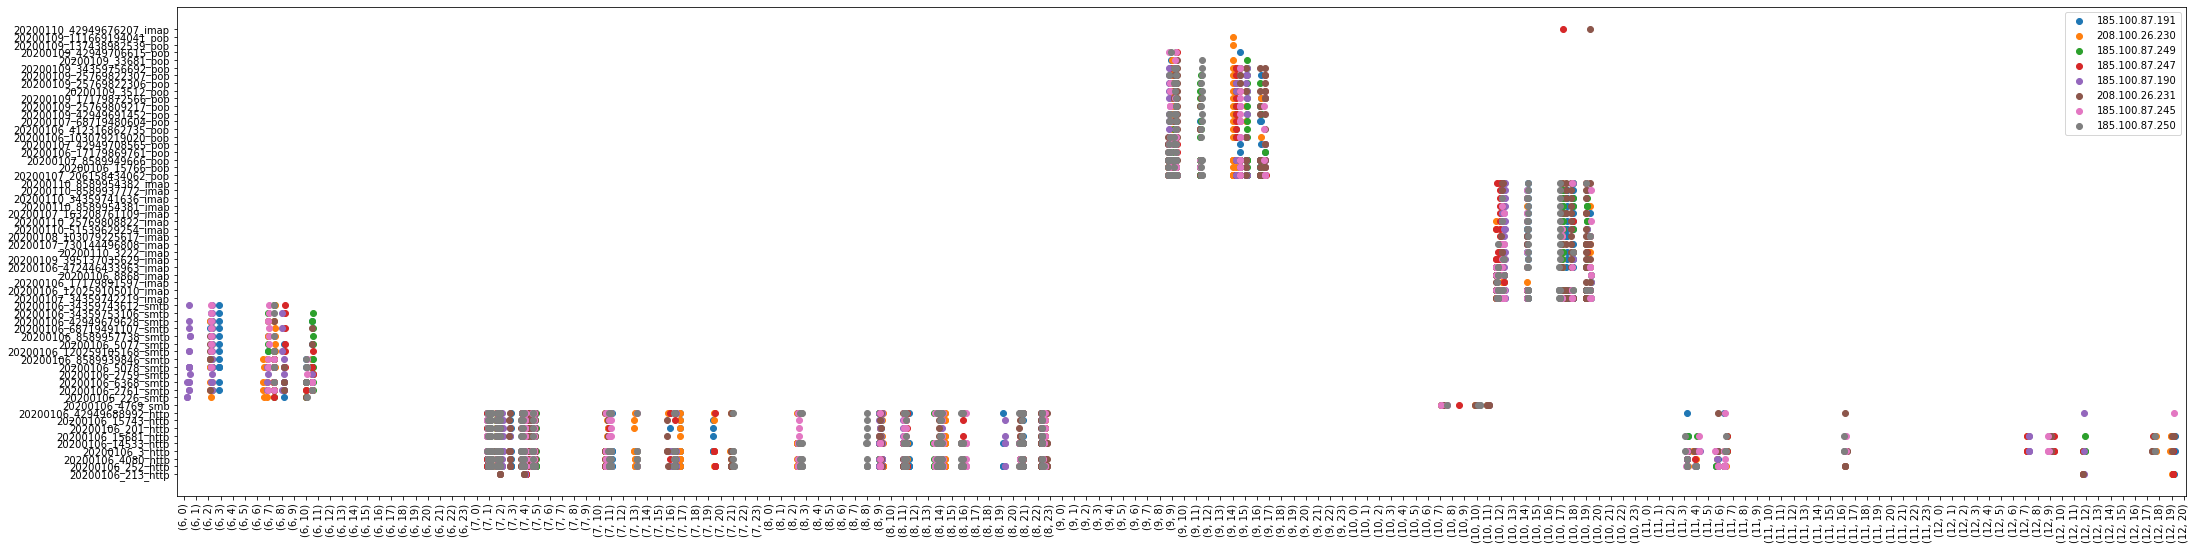

In [10]:
gp = GroupPlotter(group_df)
gp.plotLifeCycle(0)